In [ ]:
!pip install fbm

In [ ]:
from fbm import FBM
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Dropout, LeakyReLU
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
### TD 1 - 1 ###
def gen_series_set(h_num=10, sample_per_h=1000, n_=100):
    vech = np.linspace(0.01, 0.99, num=h_num)
    examples = np.zeros((h_num * sample_per_h, n_))
    labels = np.zeros((h_num * sample_per_h, 1))
    for i, h in enumerate(vech):
        f= FBM(n_, hurst=h)
        for j in range(sample_per_h):
            examples[i * sample_per_h + j, :] = f.fbm()[1:] 
            labels[i * sample_per_h + j, :] = np.array([h])
    return examples, labels

def gen_single_test(h, sample=10, n_=100):
    examples = np.zeros((sample, n_))
    labels = np.ones((sample, 1)) * h
    f= FBM(n_, hurst=h)
    for j in range(sample):
        examples[j, :] = f.fbm()[1:] 
    return examples, labels

def run_dense_net(epoch=100, h_num=10, sample_per_h=1000, n_=100):
    train_set, train_tar = gen_series_set(h_num, sample_per_h, n_)

    model = Sequential()
    model.add(Dense(12, input_dim=n_, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(12, activation='relu'))

    model.add(Dense(1, activation='linear'))

    print(model.summary())
    
    model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error'])
    history = model.fit(train_set, train_tar, validation_split=0.2, epochs=epoch, verbose=0)
    print('*** model training done ***')
    plt.plot(history.history['loss'])
    plt.xlabel('epoch')
    plt.ylabel('mse')
    
    return model

def plot_2_1(model):
    vech = np.linspace(0.01, 0.99, num=100)
    mse = []
    mae = []
    for h in vech:
        test_set, test_tar = gen_single_test(h)
        res = model.evaluate(test_set, test_tar, verbose=0)
        mse.append(res[0])
        mae.append(res[1])

    print('Metrics for Hurst estimation using DNN : ')
    fig, ax = plt.subplots(2, figsize=(8, 8))
    ax[0].plot(vech, mse)
    ax[1].plot(vech, mae)
    ax[0].set_title('Mean squared error')
    ax[1].set_title('Mean absolute error (mean bias)')
    ax[0].set_ylabel('mse')
    ax[1].set_ylabel('mae')
    ax[0].set_xlabel('H')
    ax[1].set_xlabel('H')
    fig.tight_layout()
    plt.show()

### 2 - 2 ###
def run_cnn(epoch=100, h_num=10, sample_per_h=1000, n_=100, h_num_test=100, sample_per_h_test=10):
    train_set, train_tar = gen_series_set(h_num, sample_per_h, n_)
    train_set = np.expand_dims(train_set, 2)

    model = Sequential()
    model.add(Conv1D(32, 5, input_shape=(n_, 1), activation=LeakyReLU(alpha=0.1)))
    model.add(MaxPool1D(pool_size=3))
    model.add(Dropout(0.25))
    model.add(Conv1D(64, 5, activation=LeakyReLU(alpha=0.1)))
    model.add(MaxPool1D(pool_size=3))
    model.add(Dropout(0.25))
    model.add(Conv1D(128, 5, activation=LeakyReLU(alpha=0.1)))
    model.add(MaxPool1D(pool_size=3))
    model.add(Dropout(0.4))
    model.add(Dense(128, activation=LeakyReLU(alpha=0.1)))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='linear'))

    print(model.summary())
    
    model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error'])
    history = model.fit(train_set, train_tar, validation_split=0.2, epochs=epoch, batch_size=64, verbose=0)
    print('*** model training done ***')
    
    plt.plot(history.history['loss'])
    plt.xlabel('epoch')
    plt.ylabel('mse')
    return model


def plot_2_2(model):
    vech = np.linspace(0.01, 0.99, num=100)
    mse = []
    mae = []
    for h in vech:
        test_set, test_tar = gen_single_test(h)
        test_set = np.expand_dims(test_set, 2)
        res = model.evaluate(test_set, test_tar, verbose=0)
        mse.append(res[0])
        mae.append(res[1])

    print('Metrics for Hurst estimation using DNN : ')
    fig, ax = plt.subplots(2, figsize=(8, 8))
    ax[0].plot(vech, mse)
    ax[1].plot(vech, mae)
    ax[0].set_title('Mean squared error')
    ax[1].set_title('Mean absolute error (mean bias)')
    ax[0].set_ylabel('mse')
    ax[1].set_ylabel('mae')
    ax[0].set_xlabel('H')
    ax[1].set_xlabel('H')
    fig.tight_layout()
    plt.show()


# exercice 1 Réseaux dense

/usr/local/lib/python3.7/dist-packages/fbm/fbm.py:172: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  "Combination of increments n and Hurst value H "


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                1212      
_________________________________________________________________
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________
None
*** model training done ***
Metrics for Hurst estimation using DNN : 


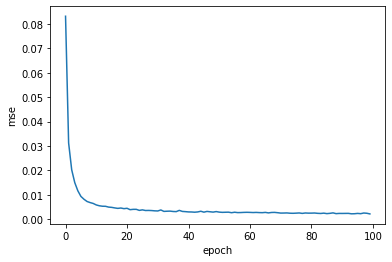

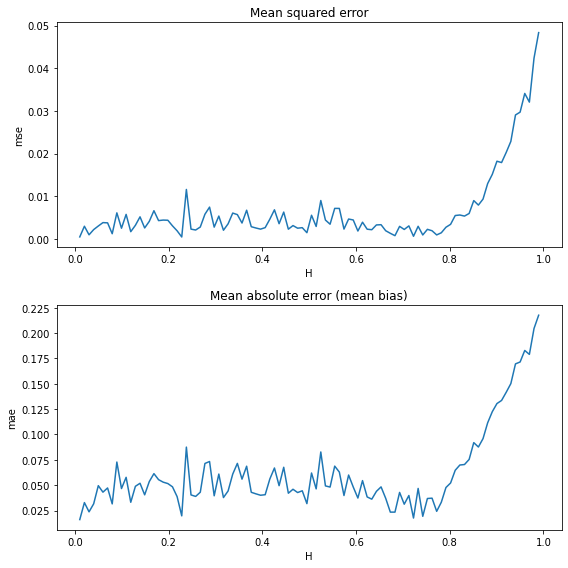

In [ ]:
m = run_dense_net()
plot_2_1(m)

# exercice 2 CNN


/usr/local/lib/python3.7/dist-packages/fbm/fbm.py:172: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  "Combination of increments n and Hurst value H "


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 96, 32)            192       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 32, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            10304     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 9, 64)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 64)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 5, 128)           

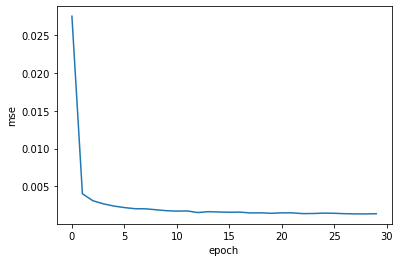

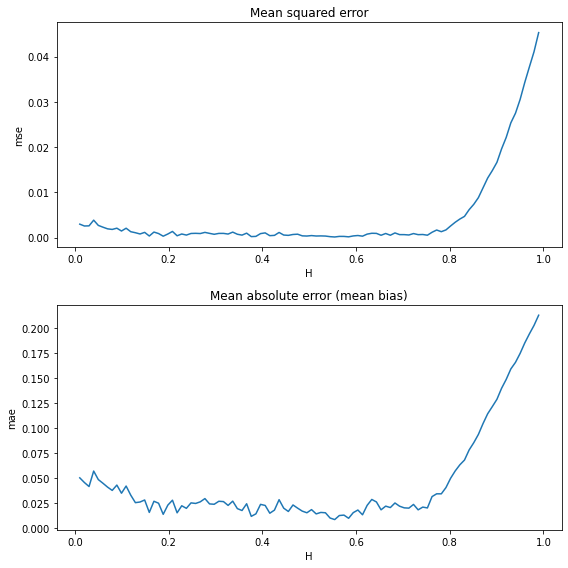

In [ ]:
m2 = run_cnn(epoch=30)
plot_2_2(m2)

## Comparer avec le résultat obtenu par DNN:
L'erreur converge beaucoup plus rapidement. En plus, le biais moyen et l'erreur moyenne racine sont plus petits et plus stables en fonction de H. Néanmoins, ils ont tous les deux une augmentation d'erreur quand H s'approche de 1.